In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import folium
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Data Extraction and Loading**

In [3]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/accident_data20.csv', low_memory = False)

In [4]:
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [5]:
# inspect the columns
df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [6]:
# We now want to select specified columns for EDA
columns_of_interest = [ 'longitude', 'latitude',
    'accident_year', 'accident_severity', 'number_of_vehicles',
    'number_of_casualties', 'date', 'day_of_week', 'time',
    'road_type', 'speed_limit', 'junction_detail', 'junction_control',
    'light_conditions',
    'weather_conditions', 'road_surface_conditions',
    'special_conditions_at_site', 'carriageway_hazards',
    'urban_or_rural_area', 'lsoa_of_accident_location']

data = df[columns_of_interest]

**Initial Data Inspection**

In [7]:
# Display the first few rows of the selected data
data.head()

,longitude,latitude,accident_year,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,lsoa_of_accident_location
0,-0.254001,51.462262,2020,3,1,1,04/02/2020,3,09:00,6,20,0,-1,1,9,9,0,0,1,E01004576
1,-0.139253,51.470327,2020,3,1,2,27/04/2020,2,13:55,6,20,9,2,1,1,1,0,0,1,E01003034
2,-0.178719,51.529614,2020,3,1,1,01/01/2020,4,01:25,6,30,3,1,4,1,2,0,0,1,E01004726
3,-0.001683,51.541210,2020,2,1,1,01/01/2020,4,01:50,6,30,0,-1,4,1,1,0,0,1,E01003617
4,-0.137592,51.515704,2020,3,1,2,01/01/2020,4,02:25,6,30,3,4,4,1,1,0,0,1,E01004763


In [8]:
# First, we check for missing value
data.isnull().sum()

,0
longitude,14
latitude,14
accident_year,0
accident_severity,0
number_of_vehicles,0
number_of_casualties,0
date,0
day_of_week,0
time,0
road_type,0


In [9]:
# check for the overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   91185 non-null  float64
 1   latitude                    91185 non-null  float64
 2   accident_year               91199 non-null  int64  
 3   accident_severity           91199 non-null  int64  
 4   number_of_vehicles          91199 non-null  int64  
 5   number_of_casualties        91199 non-null  int64  
 6   date                        91199 non-null  object 
 7   day_of_week                 91199 non-null  int64  
 8   time                        91199 non-null  object 
 9   road_type                   91199 non-null  int64  
 10  speed_limit                 91199 non-null  int64  
 11  junction_detail             91199 non-null  int64  
 12  junction_control            91199 non-null  int64  
 13  light_conditions            911

In [10]:
# check for the summary statistics
data.describe()

,longitude,latitude,accident_year,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
count,91185.000000,91185.000000,91199.0,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,-1.189258,52.351073,2020.0,2.768232,1.835272,1.267382,4.121558,5.256001,36.270113,3.934879,1.737497,2.065308,1.702047,1.391583,0.244740,0.180594,1.323205
std,1.367786,1.327573,0.0,0.456682,0.677272,0.681473,1.932200,1.684878,13.896032,12.612777,2.510125,1.747690,1.845786,0.925690,1.318554,1.149791,0.468031
min,-7.497375,49.970479,2020.0,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,-2.107789,51.457237,2020.0,3.000000,1.000000,1.000000,2.000000,6.000000,30.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,-1.046912,51.763385,2020.0,3.000000,2.000000,1.000000,4.000000,6.000000,30.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,-0.125238,53.297386,2020.0,3.000000,2.000000,1.000000,6.000000,6.000000,40.000000,3.000000,4.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000
max,1.756257,60.541144,2020.0,3.000000,13.000000,41.000000,7.000000,9.000000,70.000000,99.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000


**Summary Statistics Results**

* All accidents occur in the year 2020 as expected.
* Accident severity ranges from 1 (most severe) to 3 (least severe), the mean is 2.77, indicating that most accidents in 2020 are less severe
* Number of vehicles ranges from 1 to 13, and the mean is 1.84 suggesting that most accidents involve only 1 or 2 vehicles
* Number of casualties ranges from 1 to 16, and the mean is 1.27, indicating that most accidents results in small number of casualties
* For the speed limit, the range is from -1 (possibly indicating mssing or erroneous data) to 70mph. It has a mean of 36.27
* Date has 366 unique dates, indicating a data for a full leap year
* Day of the week has 7 unique values, one for each day








In [11]:
# Check for unique values in all the columns
data.nunique()

,0
longitude,89589
latitude,88748
accident_year,1
accident_severity,3
number_of_vehicles,13
number_of_casualties,16
date,366
day_of_week,7
time,1438
road_type,6


**Observations for Data Cleaning**

Using the data dictionary the following observations were noted:
* junction_detail has 11 uniques values instead of 9   
* junction_control has 6 unique values instead of 4
* light_condition has 6 unique values instead of 5
* weather_conditions has 10 unique values instead of 9
* road_surface_condition has 7 unique values instead of 5
* special_condition_at_site has 10 unique values instead of 8
* carriageway_hazards has 8 unique values instead of 6
* urban_or_rural_area has 3 unique values intead of 2
* Change data type for date and time column












**Data Cleaning**

In [12]:
# Drop null values
data = data.dropna(subset=['latitude', 'longitude'])

In [13]:
# Use value count and viz to to understand the distribution of values in the column including
# the anomalies
def value_counts_and_viz(data, column_name):
    """
    Function to perform value count and visualization for a specified column in a DataFrame.

    Parameters:
    data (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to analyze.

    Returns:
    None
    """
    if column_name not in data.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return

    # Perform value count
    value_counts = data[column_name].value_counts()
    print(value_counts)

    # Plot the value counts
    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

junction_detail
 0     37972
 3     25622
 6      8428
 1      7324
 9      4704
 8      1887
 99     1508
 2      1300
 7      1279
 5      1159
-1         2
Name: count, dtype: int64


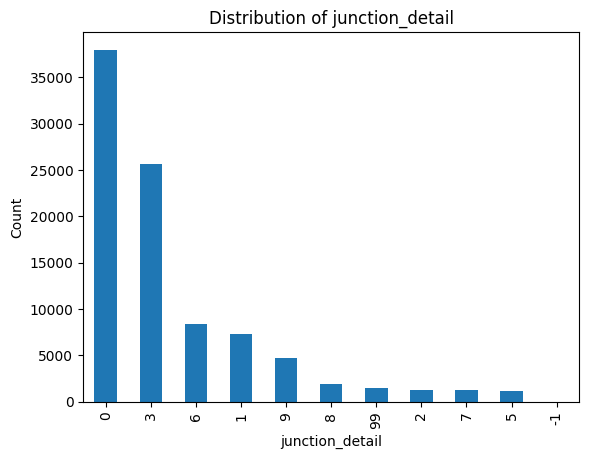

junction_control
 4    39993
-1    38292
 2    10405
 9     1536
 3      582
 1      377
Name: count, dtype: int64


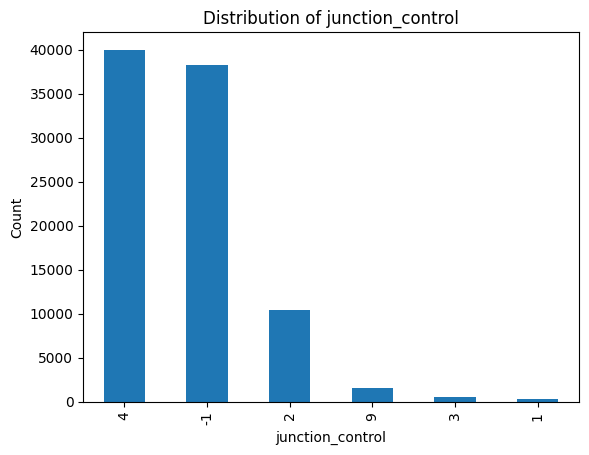

light_conditions
 1    64448
 4    19025
 6     4834
 7     2192
 5      685
-1        1
Name: count, dtype: int64


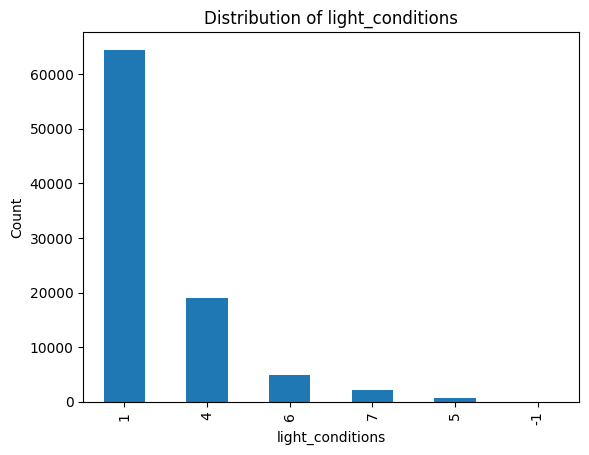

weather_conditions
 1    70720
 2    11581
 8     2629
 9     2421
 5     1665
 4     1400
 7      510
 3      185
 6       73
-1        1
Name: count, dtype: int64


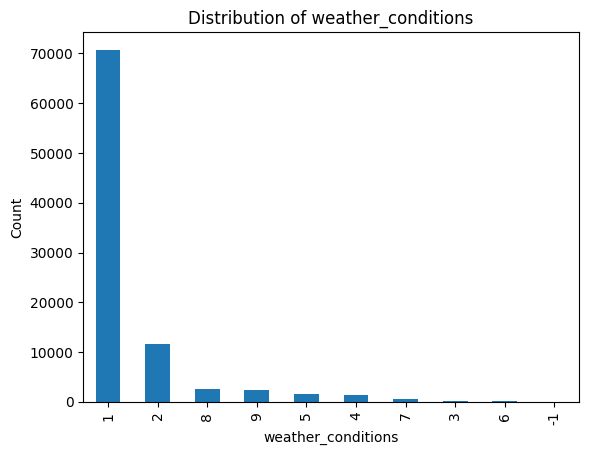

road_surface_conditions
 1    62687
 2    26238
 9      847
 4      764
-1      315
 5      184
 3      150
Name: count, dtype: int64


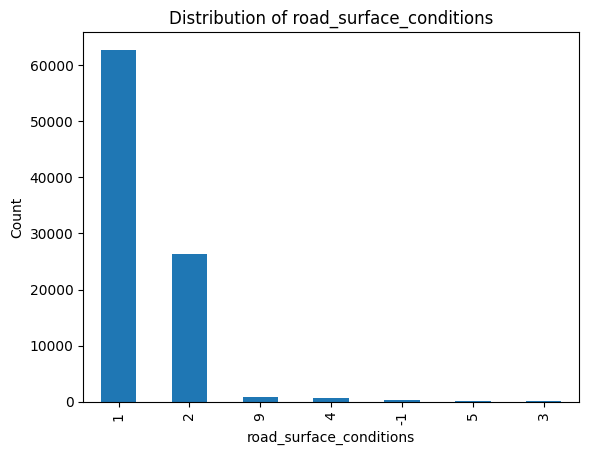

special_conditions_at_site
 0    87295
 9     1452
 4     1106
 7      317
 5      228
-1      218
 1      213
 3      158
 6      151
 2       47
Name: count, dtype: int64


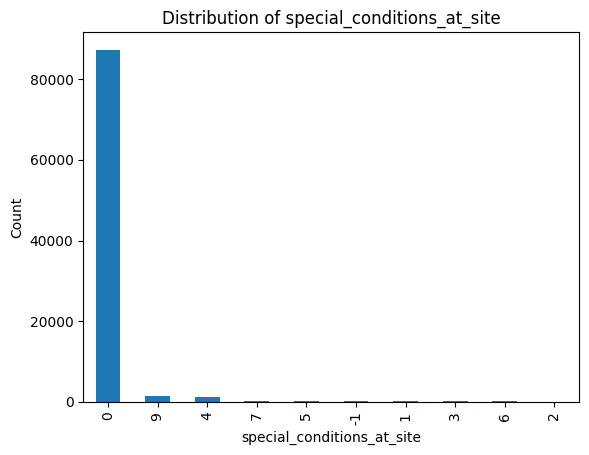

carriageway_hazards
 0    87867
 9     1191
 2     1079
 7      314
 1      220
-1      208
 6      155
 3      151
Name: count, dtype: int64


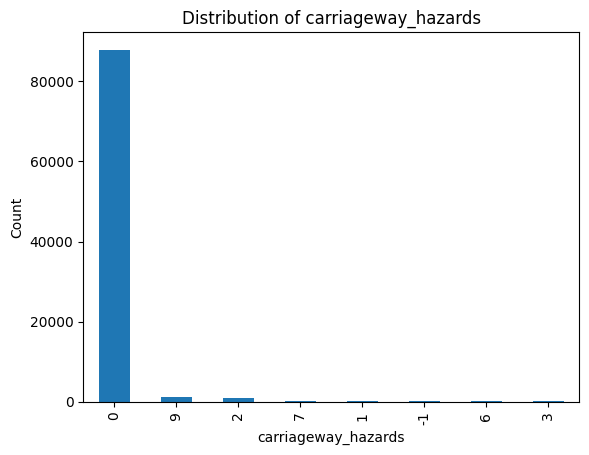

urban_or_rural_area
1    61737
2    29448
Name: count, dtype: int64


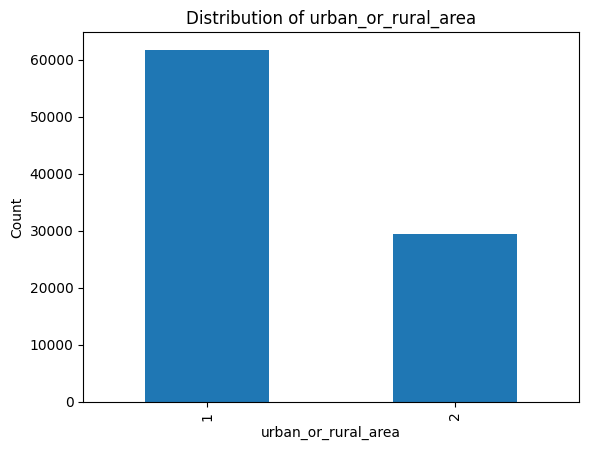

In [14]:
value_counts_and_viz(data, 'junction_detail')
value_counts_and_viz(data, 'junction_control')
value_counts_and_viz(data, 'light_conditions')
value_counts_and_viz(data, 'weather_conditions')
value_counts_and_viz(data, 'road_surface_conditions')
value_counts_and_viz(data, 'special_conditions_at_site')
value_counts_and_viz(data, 'carriageway_hazards')
value_counts_and_viz(data, 'urban_or_rural_area')


In [15]:
# Drop the row with with -1 speed limit in the speed_limit column
data = data[data['speed_limit'] != -1]

In [16]:
# Drop rows with values of -1 in the junction_detail column
data = data[data['junction_detail'] != -1]

# Replace all rows of values 99 with 9
data.loc[data['junction_detail'] == 99, 'junction_detail'] = 9

In [17]:
# drop rows with values of 9 in the junction_control column
data = data[data['junction_control'] != 9]

# Replace all rows of values -1 with 1
data.loc[data['junction_control'] == -1, 'junction_control'] = 1

In [18]:
# Drop rows with values of -1 in the light_condtions coulumn
data = data[data['light_conditions'] != -1]

In [19]:
# Drop rows with values of -1 in the weather_conditions column
data = data[data['weather_conditions'] != -1]

In [20]:
# Drop rows with values of -1 and 9 in the road_surface_condition column
data = data[(data['road_surface_conditions'] != -1) & (data['road_surface_conditions'] != 9)]

In [21]:
# Drop rows with values of -1 and 9 in the special_condition_at_site column
data = data[(data['special_conditions_at_site'] != -1) & (data['special_conditions_at_site'] != 9)]

In [22]:
# Drop rows with values of -1 and 9 in the special_condition_at_site column
data = data[(data['carriageway_hazards'] != -1) & (data['carriageway_hazards'] != 9)]

In [23]:
# Drop rows with values of 3 in the urban_or_rural_area column
data = data[data['urban_or_rural_area'] != 3]

In [24]:
# Check data type for date and time columns
data.dtypes


,0
longitude,float64
latitude,float64
accident_year,int64
accident_severity,int64
number_of_vehicles,int64
number_of_casualties,int64
date,object
day_of_week,int64
time,object
road_type,int64


In [25]:
# Change the date and time data tyype to the appropriate data type
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y', dayfirst=True)
data['time'] = pd.to_datetime(data['time'], format='%H:%M')

In [26]:
#check data types of the data again
data.dtypes

,0
longitude,float64
latitude,float64
accident_year,int64
accident_severity,int64
number_of_vehicles,int64
number_of_casualties,int64
date,datetime64[ns]
day_of_week,int64
time,datetime64[ns]
road_type,int64


In [27]:
# Check for null values again
data.isnull().sum()

,0
longitude,0
latitude,0
accident_year,0
accident_severity,0
number_of_vehicles,0
number_of_casualties,0
date,0
day_of_week,0
time,0
road_type,0


**Exploratory Data Analysis**

1. Univariate Analysis

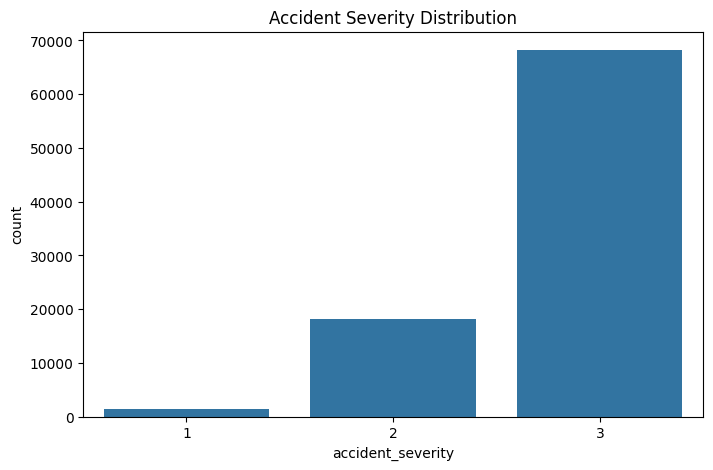

In [28]:
# Accident Severity
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='accident_severity')
plt.title('Accident Severity Distribution')
plt.show()

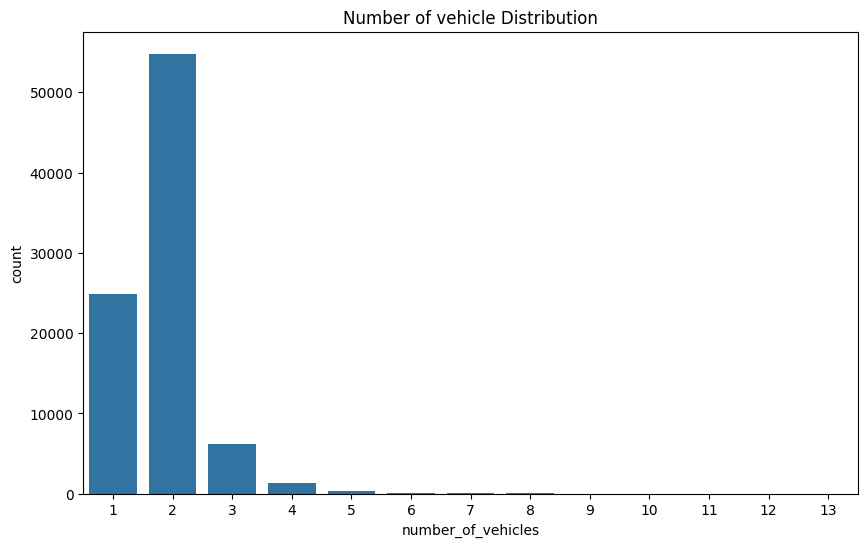

In [29]:
# Number of Vehicles
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='number_of_vehicles')
plt.title('Number of vehicle Distribution')
plt.show()

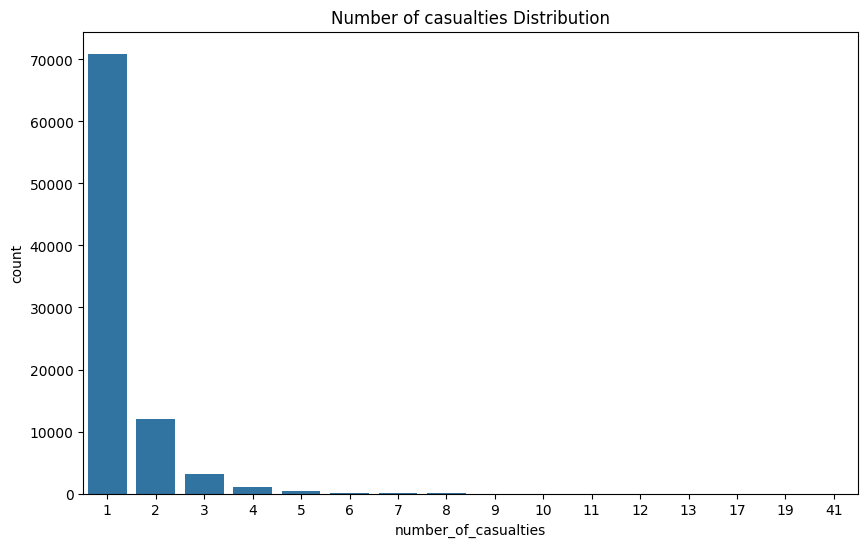

In [30]:
# Number of casualties
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='number_of_casualties')
plt.title('Number of casualties Distribution')
plt.show()

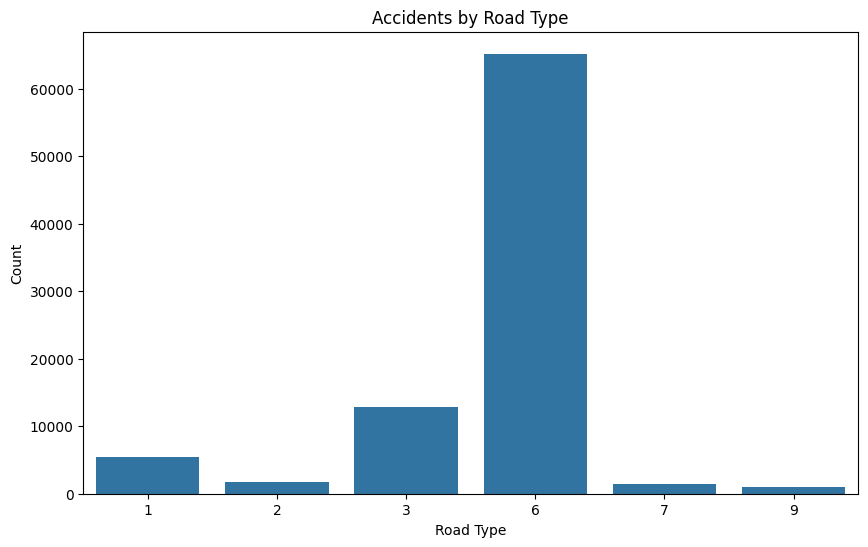

In [31]:
# Road type
plt.figure(figsize=(10, 6))
sns.countplot(x='road_type', data=data)
plt.title('Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.show()

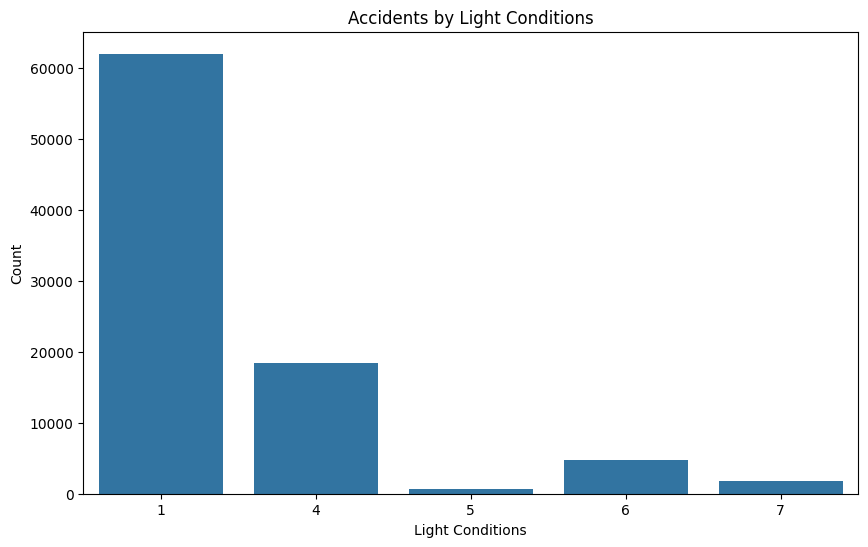

In [32]:
# Light conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='light_conditions', data=data)
plt.title('Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.show()

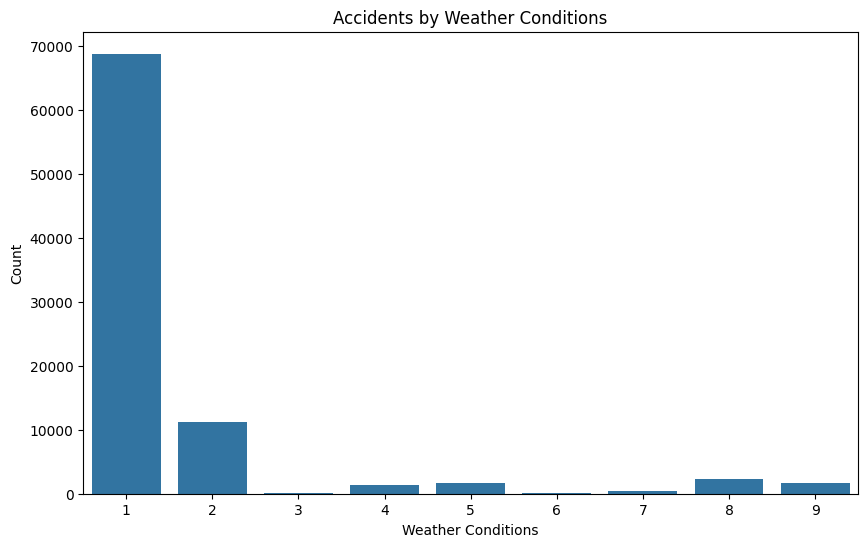

In [33]:
# Weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_conditions', data=data)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()

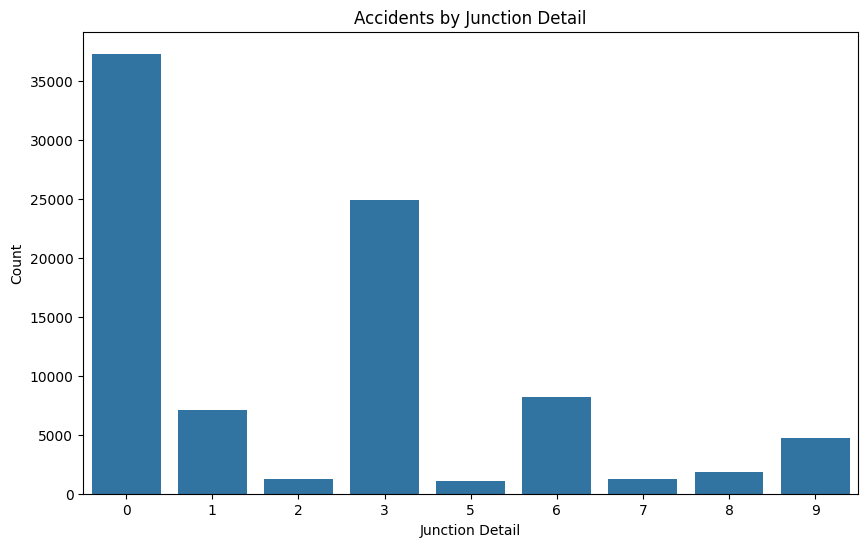

In [34]:
# junction_detail
plt.figure(figsize=(10, 6))
sns.countplot(x='junction_detail', data=data)
plt.title('Accidents by Junction Detail')
plt.xlabel('Junction Detail')
plt.ylabel('Count')
plt.show()

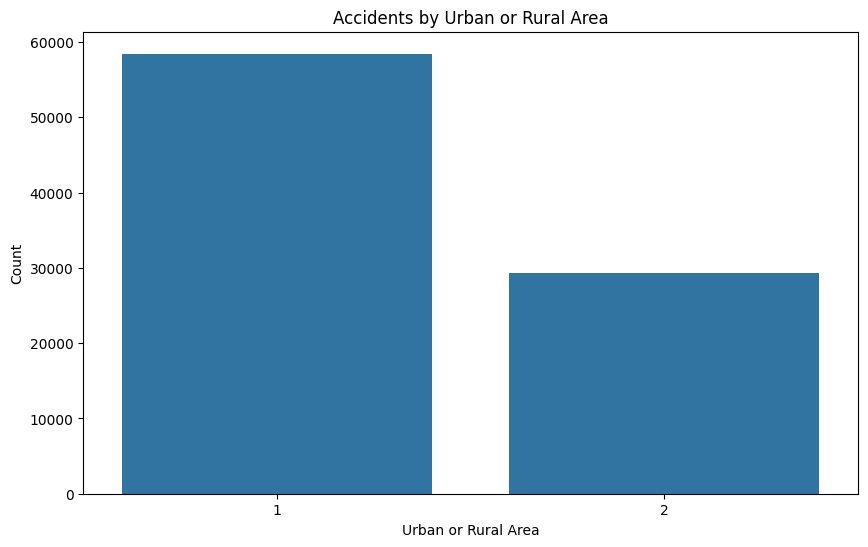

In [35]:
# Urban or Rural Area
plt.figure(figsize=(10, 6))
sns.countplot(x='urban_or_rural_area', data=data)
plt.title('Accidents by Urban or Rural Area')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Count')
plt.show()

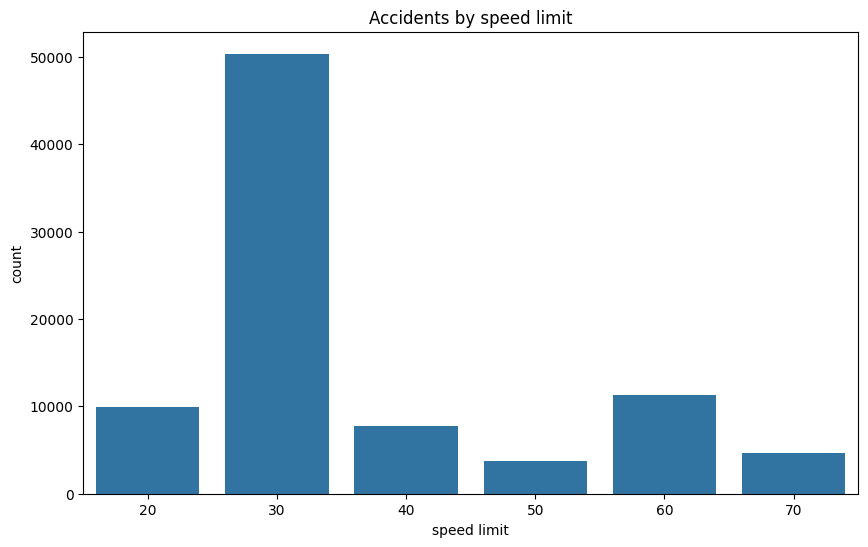

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='speed_limit', data=data)
plt.title('Accidents by speed limit')
plt.xlabel('speed limit')
plt.show()

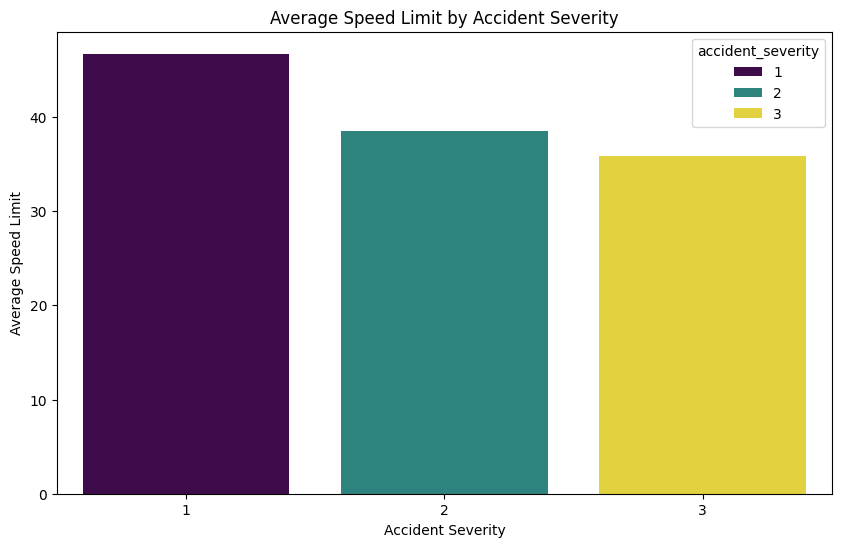

In [37]:
# Calculate the mean speed limit for each severity category
mean_speed = data.groupby('accident_severity')['speed_limit'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_speed, x='accident_severity', y='speed_limit', hue='accident_severity', palette='viridis')
plt.title('Average Speed Limit by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Average Speed Limit')
plt.show()

2. Bivariate Analysis

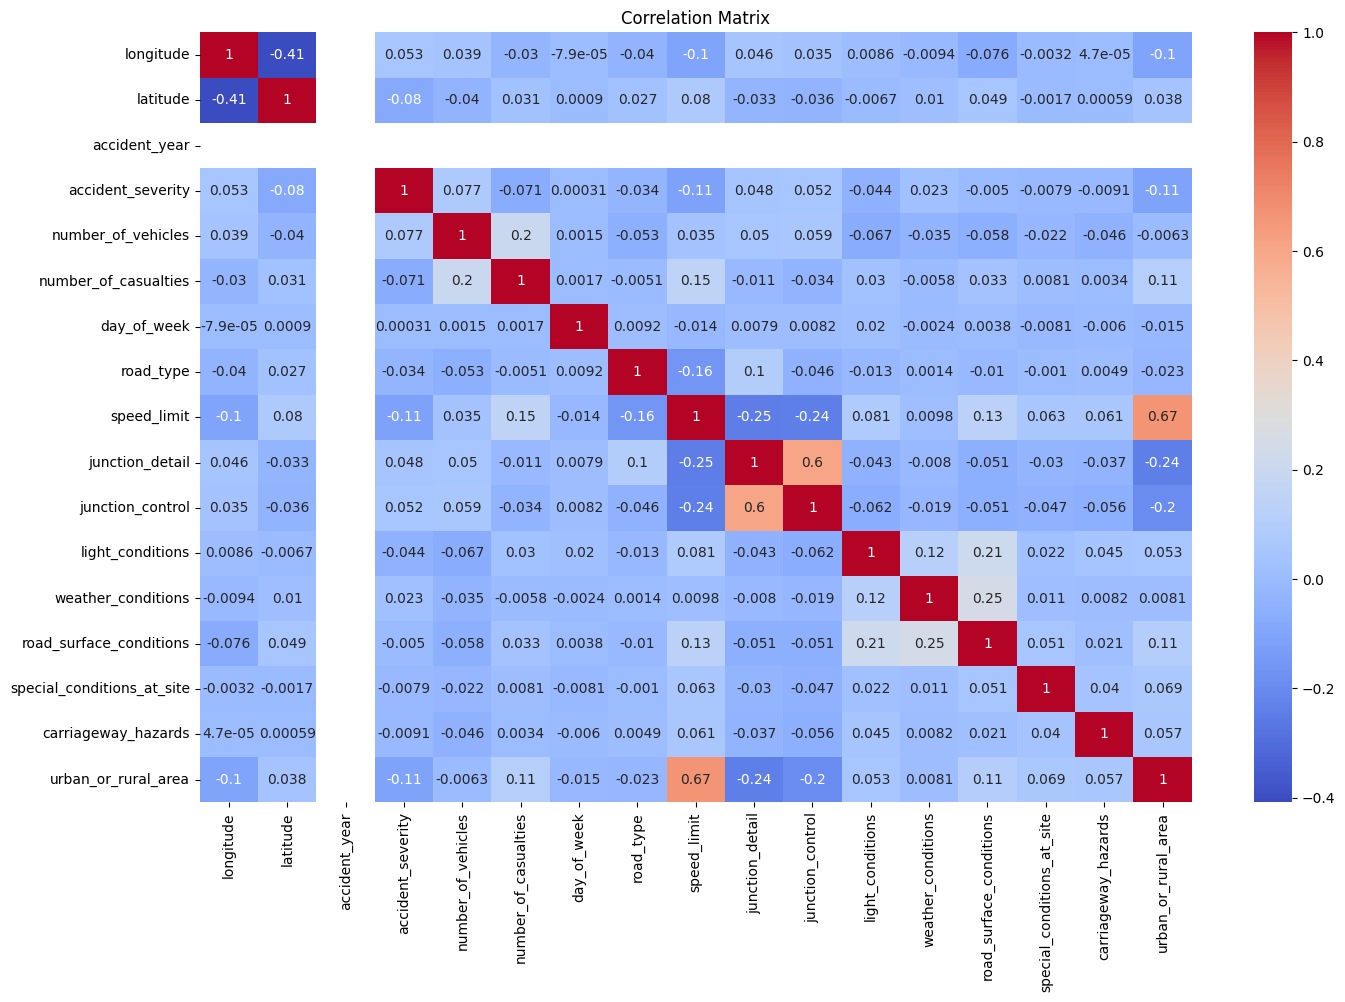

In [38]:
# Correlation matrix for numerical variables
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

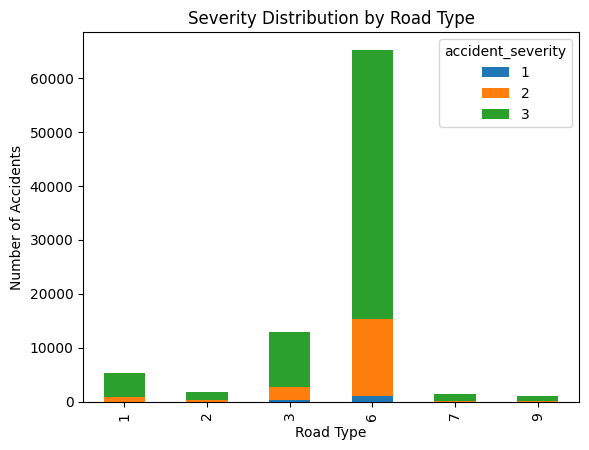

In [39]:
# Severity distribution by road type
severity_by_road_type = data.groupby('road_type')['accident_severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
severity_by_road_type.plot(kind='bar', stacked=True)
plt.title('Severity Distribution by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.show()

<Figure size 1000x600 with 0 Axes>

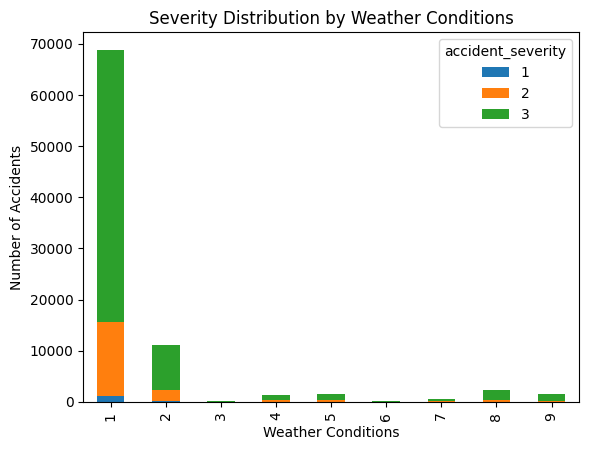

In [40]:
# Severity by weather conditions
severity_by_weather = data.groupby('weather_conditions')['accident_severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
severity_by_weather.plot(kind='bar', stacked=True)
plt.title('Severity Distribution by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()

<Figure size 1000x600 with 0 Axes>

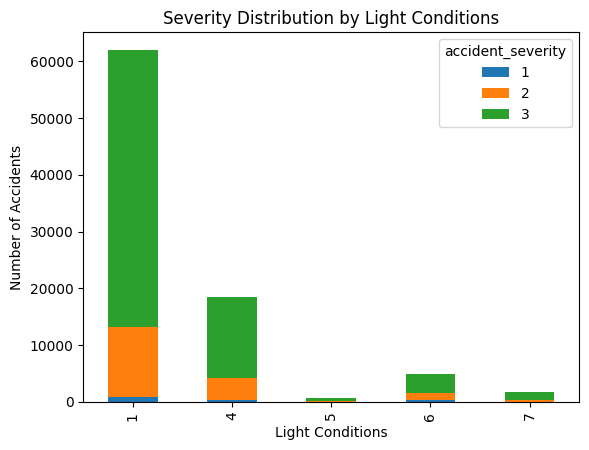

In [41]:
# Severity by light conditions
severity_by_light = data.groupby('light_conditions')['accident_severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
severity_by_light.plot(kind='bar', stacked=True)
plt.title('Severity Distribution by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.show()


<Figure size 1000x600 with 0 Axes>

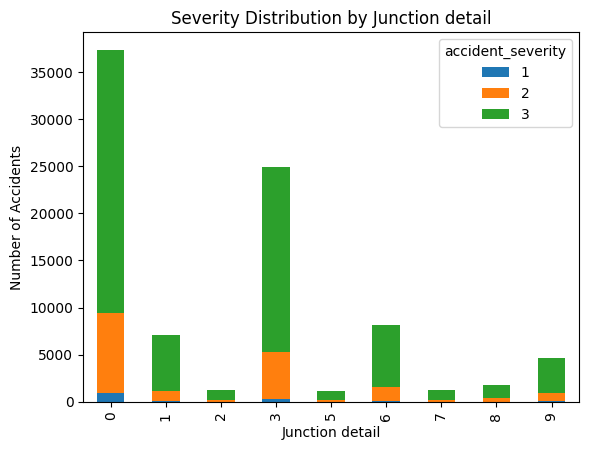

In [42]:
# Severity by junction_detail
severity_by_junction_detail = data.groupby('junction_detail')['accident_severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
severity_by_junction_detail.plot(kind='bar', stacked=True)
plt.title('Severity Distribution by Junction detail')
plt.xlabel('Junction detail')
plt.ylabel('Number of Accidents')
plt.show()


3. Time Series Analysis

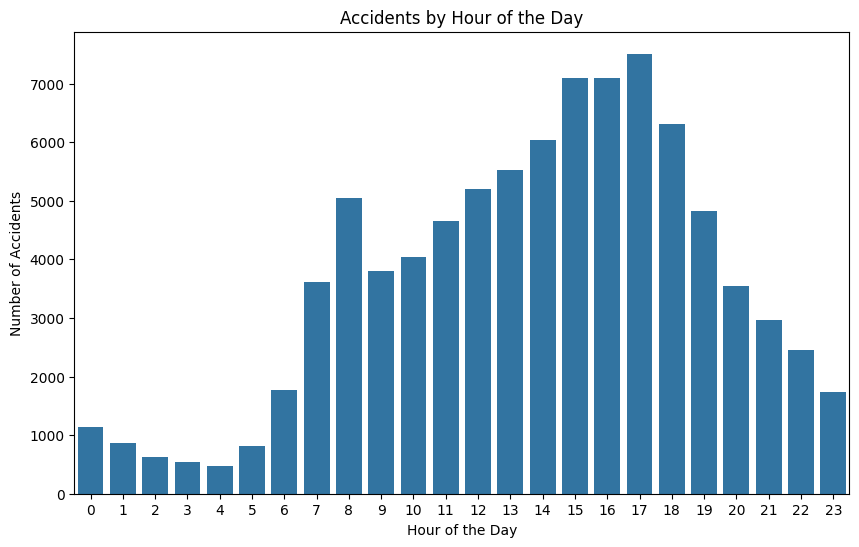

In [43]:
# Accidents by hour of the day
data['hour'] = data['time'].dt.hour
accidents_by_hour = data['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_hour.index, y=accidents_by_hour.values)
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

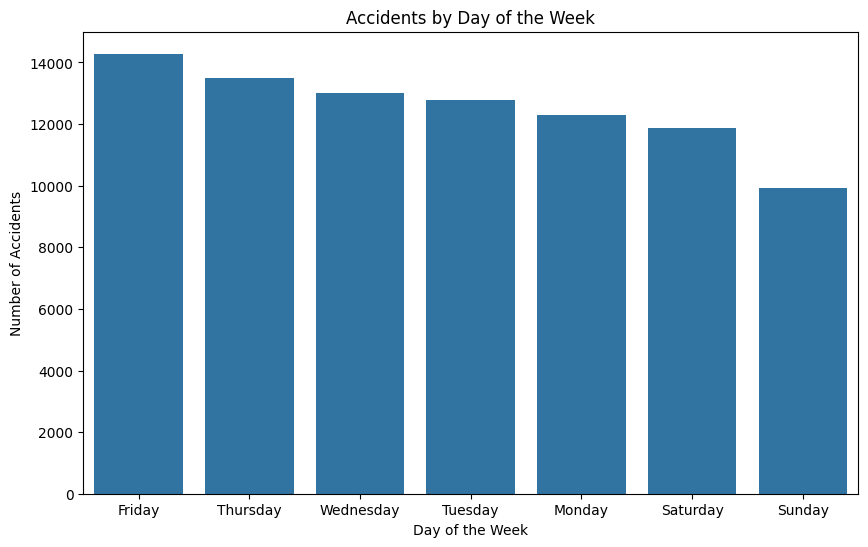

In [44]:
# Accidents by day of the week
data['day_of_week'] = data['date'].dt.day_name()
accidents_by_day = data['day_of_week'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values)
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

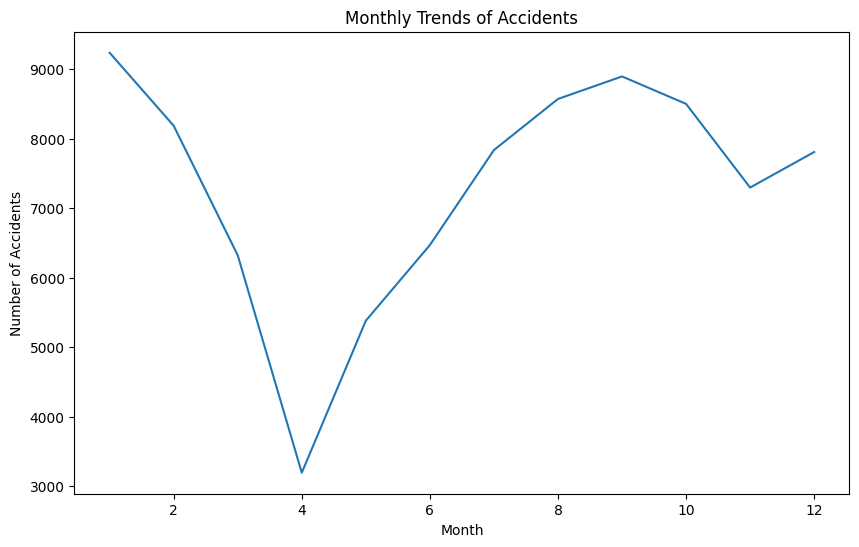

In [45]:
# Monthly trends
data['month'] = data['date'].dt.month
accidents_by_month = data['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=accidents_by_month.index, y=accidents_by_month.values)
plt.title('Monthly Trends of Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

4. Spatial Analysis

In [46]:
import folium

map_center = [54.5, -3.5]  # Center of the UK
m = folium.Map(location=map_center, zoom_start=6)

for idx, row in data.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=5,
                        color='red' if row['accident_severity'] == 'Fatal' else 'blue',
                        fill=True).add_to(m)

m.save('uk_road_accidents_map1.html')

## **Building upon the completed exploratory data analysis (EDA), the next phase deepens the investigation into road traffic accidents, focusing on accident severity, geographical distribution, data quality, and predictive modeling**

This phase has the following objectives:
* Use apriori algorithm to uncover relationships between variables influencing accidents
* Identify accidents in some regions
* Use outlier detection methods to identify unusual entries in the dataset
* Develop a classification model using the data that accurately predicts fatal injuries sustained in road traffic accidents, to inform and improve road safety measures





To begin, we will extract the exact region from the LSOA of accident location in the UK. Then, we use the lsoa code to map it to a specific location

In [47]:
# Load the lsoa region data
lsoa_regions = pd.read_csv('/content/drive/MyDrive/lsoa_region.csv')

In [48]:
lsoa_regions.head()

,lsoa_of_accident_location,region
0,E01000001,City of London 001A
1,E01000002,City of London 001B
2,E01000003,City of London 001C
3,E01000004,City of London 001D
4,E01000005,City of London 001E


In [49]:
# Lets check for null values
lsoa_regions.isnull().sum()

,0
lsoa_of_accident_location,1175
region,1175


In [50]:
# Drop the null values
lsoa_regions = lsoa_regions.dropna()

In [51]:
#create a new column general_region that contains only the general region name.
lsoa_regions['general_region'] = lsoa_regions['region'].apply(lambda x: ' '.join(x.split()[:-1]))

In [52]:
lsoa_regions.head()

,lsoa_of_accident_location,region,general_region
0,E01000001,City of London 001A,City of London
1,E01000002,City of London 001B,City of London
2,E01000003,City of London 001C,City of London
3,E01000004,City of London 001D,City of London
4,E01000005,City of London 001E,City of London


In [53]:
# Reduce all values in the general_region column to lower case
lsoa_regions['general_region'] = lsoa_regions['general_region'].str.lower()

In [54]:
# check for the value counts
lsoa_regions['general_region'].value_counts()

,count
general_region,
birmingham,714
leeds,533
sheffield,376
cornwall,331
county durham,331
...,...
conwy,3
gwynedd,2
rhondda cynon taff,2


In [55]:
# Drop the region column
lsoa_regions = lsoa_regions.drop('region', axis=1)

In [56]:
# merge the data and the lsoa_region data on lsoa_of_accident_location
data = pd.merge(data, lsoa_regions, on='lsoa_of_accident_location')

In [57]:
# Inspect the data
data.head()

,longitude,latitude,accident_year,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,road_type,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,lsoa_of_accident_location,hour,month,general_region
0,-0.139253,51.470327,2020,3,1,2,2020-04-27,Monday,1900-01-01 13:55:00,6,...,1,1,1,0,0,1,E01003034,13,4,lambeth
1,-0.139077,51.470414,2020,3,2,1,2020-03-15,Sunday,1900-01-01 12:50:00,6,...,1,1,1,0,0,1,E01003034,12,3,lambeth
2,-0.142123,51.469149,2020,3,2,2,2020-09-27,Sunday,1900-01-01 21:22:00,6,...,4,1,1,0,0,1,E01003034,21,9,lambeth
3,-0.143053,51.468579,2020,3,2,1,2020-10-22,Thursday,1900-01-01 16:40:00,2,...,1,2,2,0,0,1,E01003034,16,10,lambeth
4,-0.142245,51.468989,2020,2,2,1,2020-10-26,Monday,1900-01-01 11:20:00,6,...,1,1,1,0,0,1,E01003034,11,10,lambeth


In [58]:
# check again for null values
data.isnull().sum()

,0
longitude,0
latitude,0
accident_year,0
accident_severity,0
number_of_vehicles,0
number_of_casualties,0
date,0
day_of_week,0
time,0
road_type,0


In [59]:
import folium

# Create a base map centered in the UK
map_center = [54.5, -3.5]
m = folium.Map(location=map_center, zoom_start=6)

# Iterate over each row in the DataFrame and add a CircleMarker to the map
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red' if row['accident_severity'] == 'Fatal' else 'blue',
        fill=True,
        popup=f"Region: {row['general_region']}"
    ).add_to(m)

# Save the map to an HTML file
m.save('uk_road_accidents_map.html')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83634 entries, 0 to 83633
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   longitude                   83634 non-null  float64       
 1   latitude                    83634 non-null  float64       
 2   accident_year               83634 non-null  int64         
 3   accident_severity           83634 non-null  int64         
 4   number_of_vehicles          83634 non-null  int64         
 5   number_of_casualties        83634 non-null  int64         
 6   date                        83634 non-null  datetime64[ns]
 7   day_of_week                 83634 non-null  object        
 8   time                        83634 non-null  datetime64[ns]
 9   road_type                   83634 non-null  int64         
 10  speed_limit                 83634 non-null  int64         
 11  junction_detail             83634 non-null  int64     

In [61]:
# Select relevant columns such as the ones that are categorical or have potential associations)
data_apriori = data[['accident_severity', 'weather_conditions', 'road_type','speed_limit','junction_detail','junction_control','light_conditions','road_surface_conditions','special_conditions_at_site','carriageway_hazards','urban_or_rural_area']]


In [62]:
import warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data_apriori)
data_apriori_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())


In [63]:
# Check the transformed data
print(data_apriori_encoded.head())

   accident_severity_1  accident_severity_2  accident_severity_3  \
0                  0.0                  0.0                  1.0   
1                  0.0                  0.0                  1.0   
2                  0.0                  0.0                  1.0   
3                  0.0                  0.0                  1.0   
4                  0.0                  1.0                  0.0   

   weather_conditions_1  weather_conditions_2  weather_conditions_3  \
0                   1.0                   0.0                   0.0   
1                   1.0                   0.0                   0.0   
2                   1.0                   0.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   1.0                   0.0                   0.0   

   weather_conditions_4  weather_conditions_5  weather_conditions_6  \
0                   0.0                   0.0                   0.0   
1                   0.

In [64]:
from mlxtend.frequent_patterns import apriori, association_rules

# Set a minimum support level say 0.1 meaning the itemset appears in at least 10% of the transactions)
frequent_itemsets = apriori(data_apriori_encoded, min_support=0.1, use_colnames=True)


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [65]:
# Display the frequent itemsets
print(frequent_itemsets)


       support                                           itemsets
0     0.198580                              (accident_severity_2)
1     0.786749                              (accident_severity_3)
2     0.787921                             (weather_conditions_1)
3     0.125846                             (weather_conditions_2)
4     0.149246                                      (road_type_3)
...        ...                                                ...
3279  0.166643  (accident_severity_3, road_surface_conditions_...
3280  0.115850  (accident_severity_3, junction_control_1, road...
3281  0.109752  (accident_severity_3, road_surface_conditions_...
3282  0.107803  (accident_severity_3, road_surface_conditions_...
3283  0.108198  (road_surface_conditions_1, weather_conditions...

[3284 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
# Generate the association rules with a minimum confidence level (e.g., 0.5)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Note the following:**

* The frequent itemsets identify which combination of features frequently appear together in the data
* The association rule look for rules where certain conditions are associated with higher or lower accident severity




# **Detailed Analysis of Association Rules**

Once the association rule have been generated, we can now perform a detailed analysis to understand the strength and relevance of these rules

### **Definition of some terms**

* *Support:* The frequency of the itemsets
* *Confidence:* The likelihood that the consequent is true given the antecedent
* *Lift:* The ratio of the observed support to the expected support if the antecedent and consequent were independent. A lift greater than 1 indicates a positive association
* *Antecedent:* The conditions or items that are present
* *Consequent:* The items or outcomes that are likely to occur if the antecedents is presents






In [67]:
# Inspect the first few rows of the association rules DataFrame
print(rules.head())

             antecedents                  consequents  antecedent support  \
0  (accident_severity_2)       (weather_conditions_1)             0.19858   
1  (accident_severity_2)                (road_type_6)             0.19858   
2  (accident_severity_2)             (speed_limit_30)             0.19858   
3  (accident_severity_2)         (light_conditions_1)             0.19858   
4  (accident_severity_2)  (road_surface_conditions_1)             0.19858   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.787921  0.160055    0.805997  1.022941  0.003590    1.093174   
1            0.738492  0.155092    0.781009  1.057574  0.008443    1.194153   
2            0.582108  0.108891    0.548350  0.942008 -0.006704    0.925257   
3            0.705634  0.136428    0.687018  0.973618 -0.003697    0.940521   
4            0.701198  0.139740    0.703697  1.003564  0.000496    1.008434   

   zhangs_metric  
0       0.027984  
1       0.067929  
2    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
# Filter rules with high lift, which indicates a strong association
significant_rules = rules[rules['lift'] > 1.5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
# Analyze specific metrics
print(significant_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                             antecedents  \
54                                (weather_conditions_2)   
99                                      (speed_limit_60)   
100                                  (junction_detail_0)   
101                                 (junction_control_1)   
108                                 (junction_control_4)   
...                                                  ...   
68201  (junction_control_4, speed_limit_30, carriagew...   
68202  (junction_control_4, special_conditions_at_sit...   
68203  (urban_or_rural_area_1, junction_control_4, ro...   
68207  (junction_control_4, speed_limit_30, road_surf...   
68208  (junction_control_4, speed_limit_30, light_con...   

                                             consequents   support  \
54                           (road_surface_conditions_2)  0.121984   
99                               (urban_or_rural_area_2)  0.113554   
100                                 (junction_control_1)  0.418371   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Interpretation of the Rules**
1. **Rule 54**
  * Antecedents: (weather_conditions_2) – Weather conditions of type 2 (raining without high winds).
  * Consequents: (road_surface_conditions_2) – Road surface conditions of type 2 (wet/damp).
  * Support: 0.121984 – This rule appears in approximately 12.2% of the transactions.
  * Confidence: 0.969311 – If weather conditions are of type 2, there is a 96.9% chance that road surface conditions will be of type 2.
  * Lift: 3.372748 – The occurrence of road surface conditions of type 2 is about 3.37 times more likely when weather conditions are type 2 than expected by chance.

The above rule suggest a strong relationship between certain weather condtions and road surface condition. Specifically, raining and road type of becoming wet/damp. The high confidence and lift indicate that when rain is falling without high winds it is most likely that the road surface will be wet and damp, more so than if they were independent

2. **Rule 99**
  * Antecedents: (speed_limit_60) – Speed limit is 60
  * Consequents: (urban_or_rural_area_2) – The area is of type 2 (rural).
  * Support: 0.113554 – This rule appears in about 11.4% of transactions.
  * Confidence: 0.964065 – If the speed limit is 60, there is a 96.4% chance that the area is rural.
  * Lift: 3.005277 – The likelihood of the area being rural is about 3 times higher when the speed limit is 60 compared to what would be expected by chance.

This rule indicates a strong association between a speed limit of 60 and rural area. The high confidence and lift suggest that a speed limit of 60 is strongly associated with rural areas, more so than would be expected by chance.

3. **Rule 100**
  * Antecedents: (junction_detail_0) – Junction detail type 0. (Not at or within 20 metres of junction)
  * Consequents: (junction_control_1) – Junction control type 1 (Authorised person)
  * Support: 0.418371 – This rule appears in approximately 41.8% of transactions.
  * Confidence: 0.999943 – If the junction detail is type 0, there is a 99.99% chance that the junction control will be type 1.
  * Lift: 2.349135 – The occurrence of junction control type 1 is about 2.35 times more likely when the junction detail is type 0 than would be expected by chance.

This rule shows a very high confidence that if the junction detail is of type 0, the junction control will almost certainly be of type 1. The lift value indicates a strong association, suggesting that these two types of junction features often occur together.

4. **Rule 108**
  * Antecedents: (junction_control_4) – Junction control type 4 (Give way or uncontrolled).
  * Consequents: (junction_detail_3) – Junction detail type 3 (T or staggered junction).
  * Support: 0.247567 – This rule appears in about 24.8% of transactions.
  * Confidence: 0.549408 – If the junction control is type 4, there is a 54.9% chance that the junction detail will be type 3.
  * Lift: 1.905895 – The occurrence of junction detail type 3 is about 1.91 times more likely when the junction control is type 4 compared to what would be expected by chance.

This rule indicates a moderate association between junction control type 4 and junction detail type 3. While the confidence and lift are lower compared to the previous examples, there is still a notable association suggesting that when junction control is of type 4, junction detail tends to be of type 3.






In [70]:
# Filter data for specific regions
regions = ['Kingston upon Hull', 'darlington', 'East Riding of Yorkshire']
df_region = data[data['general_region'].isin(regions)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# Apply clustering
kmeans = KMeans(n_clusters=5)
df_region['cluster'] = kmeans.fit_predict(df_region[['latitude', 'longitude']])

# Visualize clusters on a map
map_center = [53.8, -0.4]
m = folium.Map(location=map_center, zoom_start=10)

for idx, row in df_region.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=5,
                        color=['red', 'blue', 'green', 'purple', 'orange'][row['cluster']],
                        fill=True).add_to(m)

m.save('accident_clusters_map.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-71-1951d568910d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['cluster'] = kmeans.fit_predict(df_reg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-72-0fb37e5ea73e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette=colors)


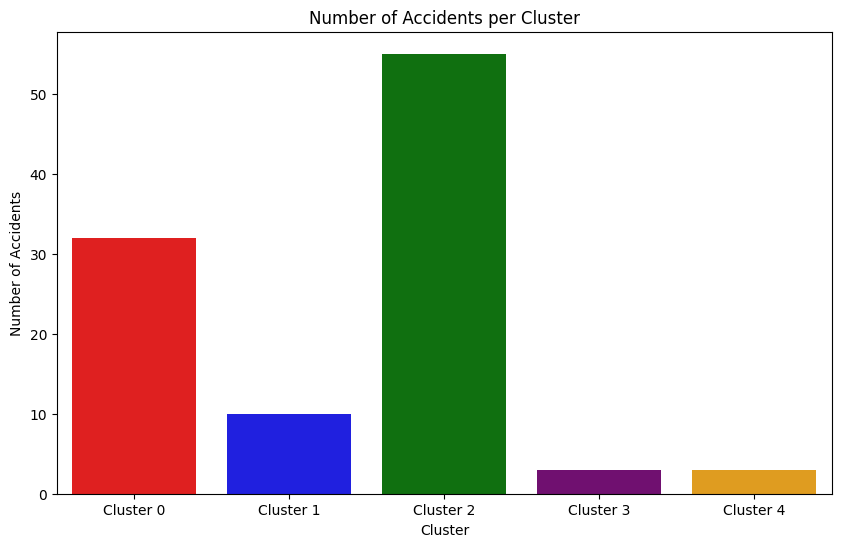

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors corresponding to clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Count the number of accidents in each cluster
cluster_distribution = df_region['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette=colors)
plt.title('Number of Accidents per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(len(cluster_distribution.index)), labels=[f'Cluster {i}' for i in cluster_distribution.index])
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


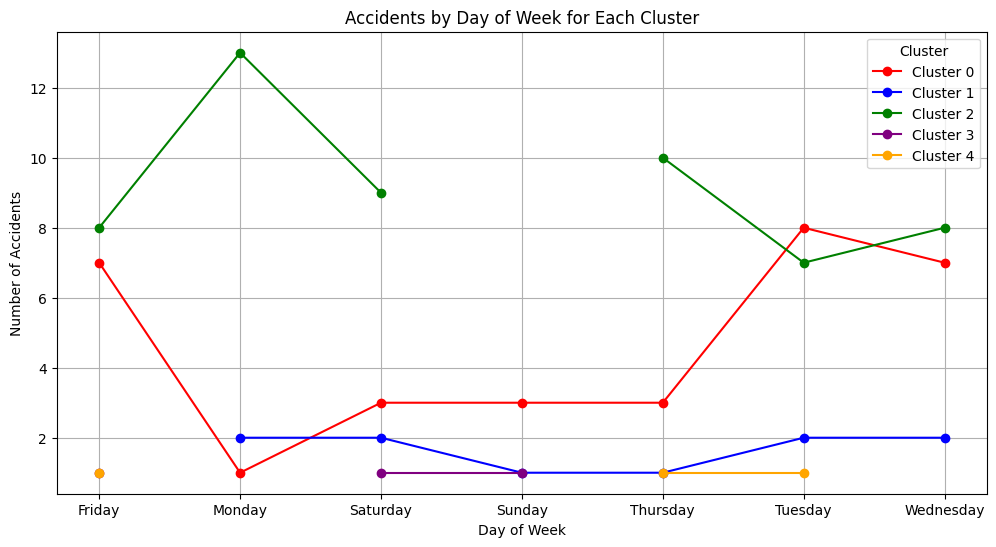

In [73]:
# Create a pivot table for line plot
cluster_day_of_week = df_region.pivot_table(index='day_of_week', columns='cluster', values='accident_severity', aggfunc='count')

plt.figure(figsize=(12, 6))
for cluster_id in cluster_day_of_week.columns:
    plt.plot(cluster_day_of_week.index, cluster_day_of_week[cluster_id], marker='o', color=colors[cluster_id], label=f'Cluster {cluster_id}')

plt.title('Accidents by Day of Week for Each Cluster')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


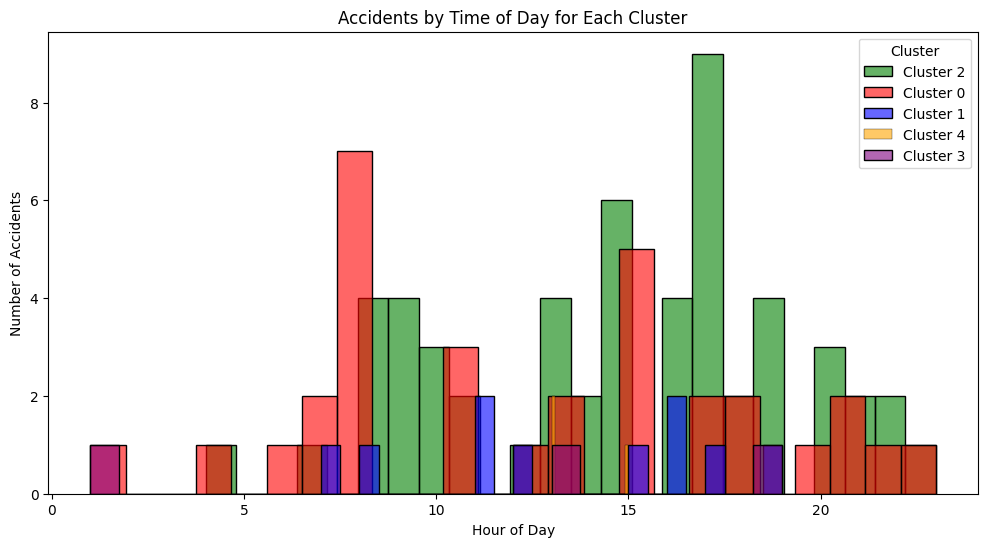

In [74]:
# Create a dataframe for time of day histogram
plt.figure(figsize=(12, 6))
for cluster_id in df_region['cluster'].unique():
    subset = df_region[df_region['cluster'] == cluster_id]
    sns.histplot(subset['hour'], bins=24, kde=False, label=f'Cluster {cluster_id}', color=colors[cluster_id], alpha=0.6)

plt.title('Accidents by Time of Day for Each Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Cluster')
plt.show()

## Outlier Detecttion and Assessment

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Select relevant features for Isolation Forest
features = data[['number_of_vehicles', 'number_of_casualties']]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['outlier_iso'] = iso_forest.fit_predict(features_scaled)

# Document outliers detected by Isolation Forest
outliers_iso = data[data['outlier_iso'] == -1]

# Remove outliers with values greater than 3 in the number of vehicles column
outliers_filtered_vehicles = outliers_iso[outliers_iso['number_of_vehicles'] <= 4]

# Further remove outliers with values greater than 10 in the number of casualties column
final_outliers = outliers_filtered_vehicles[outliers_filtered_vehicles['number_of_casualties'] <= 5]

print("Final outliers after filtering:")
print(final_outliers)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Final outliers after filtering:
       longitude   latitude  accident_year  accident_severity  \
103     0.009591  51.493670           2020                  3   
104     0.009591  51.493670           2020                  3   
129    -0.125718  51.614226           2020                  3   
138    -0.058620  51.660013           2020                  2   
151     0.220234  51.593389           2020                  3   
...          ...        ...            ...                ...   
83460  -3.369838  51.666267           2020                  3   
83559  -3.120601  51.501733           2020                  3   
83573  -3.381107  51.685459           2020                  2   
83609  -3.293184  51.899426           2020                  3   
83629  -3.458183  52.859167           2020                  3   

       number_of_vehicles  number_of_casualties       date day_of_week  \
103                     1                     3 2020-11-22      Sunday   
104                     1              

### Justification for Retaining or Removing Outliers Based on Analysis

From the outlier detection above using isolation forest, we make the following conclusions about the number of casualties and number of vehicles feature( I choose these two features because from the EDA, outliers are most likely to exist here):
1. For the number of vehicles column, accidents involving are less common, though not impossible. Depending on the region and type of roads, accidents with more than 4 vehicles might not be extremely rare. However, from our data distribution of vehicle counts in our UK dataset for 2020, number of vehicles greater than 4 is relatively uncommon. Hence, I set the threshold of 4 or more as an unusual events

2. For the number of casualties, though severe accidents can involve multiple casualties, especially in high-impact crashes or collisions involving multiple vehicles, they typically involve fewer casualties (1-5). Also, in our dataset they distribution of accident severity showed a significant small proportion of accidents in 2020 were most severe. Additionally, from the distribution of number of casualties, casualties  with numbers more than 5 were very uncommon. so setting this threshold is not too restrcitive considering the distribution of our data







## Model Building and Training

In [76]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For the feature selection, i will choose features that might be relevant to predicting accident severity.

In [77]:
features = ['number_of_vehicles','number_of_casualties','road_type','speed_limit','light_conditions', 'weather_conditions',
            'road_surface_conditions', 'urban_or_rural_area']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
X = data[features]
y = data['accident_severity']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
# Feature Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# Train a Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
# Map the class labels from [1, 2, 3] to [0, 1, 2]
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_mapped)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Map the predictions back to the original class labels
y_pred_xgb = y_pred_xgb + 1

# Now y_pred_xgb will have the values [1, 2, 3] as expected

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define a function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name, average='weighted'):
    print(f"Performance metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average=average):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average=average):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average=average):.4f}")
    print(f"\nClassification Report:\n{classification_report(y_true, y_pred)}")

# Evaluate each model
evaluate_model(y_test, y_pred_lr, 'Logistic Regression', average='weighted')
evaluate_model(y_test, y_pred_rf, 'Random Forest', average='weighted')
evaluate_model(y_test, y_pred_dt, 'Decision Tree', average='weighted')
evaluate_model(y_test, y_pred_xgb, 'XGBoost', average='weighted')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-pac

Performance metrics for Logistic Regression:
Accuracy: 0.7897
Precision: 0.7807
Recall: 0.7897
F1 Score: 0.6971

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       350
           2       0.80      0.00      0.00      4929
           3       0.79      1.00      0.88     19812

    accuracy                           0.79     25091
   macro avg       0.53      0.33      0.29     25091
weighted avg       0.78      0.79      0.70     25091

Performance metrics for Random Forest:
Accuracy: 0.7830
Precision: 0.6885
Recall: 0.7830
F1 Score: 0.7039

Classification Report:
              precision    recall  f1-score   support

           1       0.14      0.01      0.02       350
           2       0.31      0.03      0.05      4929
           3       0.79      0.98      0.88     19812

    accuracy                           0.78     25091
   macro avg       0.41      0.34      0.32     25091
weighted avg       0.69    

## **Analysis of the Models**
Considering the evaluation of the models, we notice that the models struggle significantly with classes 1 and 2, as reflected in their poor precision, recall, and F1 scores for these classes. This suggests that the models are heavily biased towards class 3, which has the majority of the instances.

Since the models are biased towards the majority class (class 3) and perform poorly on minority classes (classes 1 and 2), I would particularly as the next step focus on handling the class imbalance. To achieve this, I will using Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples or simple random oversampling.